The Dataset is about air quality of major cities in China, Jan, 2020.   

Each row of the dataset is a panel data of major pollutants and AQI (air quality index), and the temporal scale is 1 hour.  

The dataset can be reached via the link below, and I use pandas.concat() to merge daily record into one csv file.

https://quotsoft.net/air/

Two main issues are discussed below:

1. what's the patterns of air pollution in Beijing?
2. for large cities in china, which one has the worst air quality during Jan, 2020?

## Q1

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('china_aq_city_202001.csv')

In [3]:
df.head()

,date,hour,type,Beijing,Tianjin,Shijiazhuang,Tangshan,Qinhuangdao,Handan,Baoding,...,Wuwei,Zhangye,Pingliang,Jiuquan,Qingyang,Dingxi,Longnan,Wuzhong,Zhongwei,Guyuan
0,20200101,0,AQI,54.0,60.0,82.0,73.0,57.0,56.0,102.0,...,125.0,112.0,70.0,80.0,82.0,65.0,42.0,92.0,80.0,79.0
1,20200101,0,PM2.5,31.0,37.0,46.0,43.0,33.0,33.0,72.0,...,95.0,116.0,45.0,36.0,60.0,41.0,29.0,68.0,56.0,58.0
2,20200101,0,PM2.5_24h,20.0,18.0,30.0,31.0,22.0,24.0,37.0,...,51.0,54.0,23.0,32.0,41.0,66.0,23.0,31.0,43.0,25.0
3,20200101,0,PM10,57.0,65.0,113.0,91.0,63.0,61.0,139.0,...,120.0,136.0,90.0,109.0,85.0,72.0,40.0,104.0,107.0,64.0
4,20200101,0,PM10_24h,35.0,32.0,75.0,59.0,49.0,66.0,76.0,...,72.0,82.0,59.0,70.0,64.0,113.0,49.0,59.0,81.0,48.0


In [4]:
df.describe()

,date,hour,Beijing,Tianjin,Shijiazhuang,Tangshan,Qinhuangdao,Handan,Baoding,Zhangjiakou,...,Wuwei,Zhangye,Pingliang,Jiuquan,Qingyang,Dingxi,Longnan,Wuzhong,Zhongwei,Guyuan
count,1.110000e+04,11100.000000,11085.000000,11085.000000,11085.000000,11085.000000,11085.000000,11085.000000,11085.000000,11085.000000,...,11085.000000,11070.000000,11085.000000,11085.000000,11085.000000,11085.000000,10950.000000,11082.000000,11085.000000,11085.000000
mean,2.020012e+07,11.554054,39.890995,56.872926,78.980200,60.739199,46.443083,77.018740,72.561086,37.848207,...,47.823333,41.899065,41.753829,40.212972,47.354790,43.654853,34.198023,51.772805,46.866721,41.579638
std,8.957902e+00,6.901431,40.000830,63.362653,80.828249,62.754329,41.137633,84.122235,84.540821,29.121931,...,34.606719,31.827040,30.998422,30.948659,33.752948,35.037010,24.390762,48.202565,35.469163,30.538509
min,2.020010e+07,0.000000,0.190000,0.300000,0.610000,0.370000,0.540000,0.530000,0.420000,0.400000,...,0.200000,0.300000,0.150000,0.300000,0.600000,0.100000,0.100000,0.100000,0.370000,0.430000
25%,2.020011e+07,6.000000,8.000000,11.000000,16.000000,17.000000,17.000000,13.000000,13.000000,15.000000,...,19.000000,16.000000,13.000000,15.000000,16.000000,13.000000,18.000000,17.000000,15.000000,12.000000
50%,2.020012e+07,12.000000,31.000000,38.000000,48.000000,46.000000,39.000000,48.000000,46.000000,30.000000,...,43.000000,37.000000,40.000000,36.000000,51.000000,38.000000,31.000000,42.000000,43.000000,40.000000
75%,2.020012e+07,18.000000,58.000000,75.000000,121.000000,78.000000,64.000000,112.000000,94.000000,62.000000,...,75.000000,66.000000,65.000000,62.000000,75.000000,69.000000,49.000000,72.000000,73.000000,65.000000
max,2.020013e+07,23.000000,268.000000,340.000000,404.000000,410.000000,338.000000,534.000000,692.000000,180.000000,...,244.000000,323.000000,181.000000,322.000000,249.000000,342.000000,162.000000,363.000000,264.000000,153.000000


In [5]:
# analysis for beijing's AQI
aqi_beijing = df.loc[(df['type']=='AQI')].loc[:,['date','hour','Beijing']].copy()

In [6]:
aqi_beijing['timestamp'] = df["date"]*100 + df['hour']
aqi_beijing['timestamp']= aqi_beijing["timestamp"].map(lambda x:datetime.strptime(str(x),'%Y%m%d%H'))
aqi_beijing.set_index('timestamp',inplace=True)

<AxesSubplot:xlabel='timestamp'>

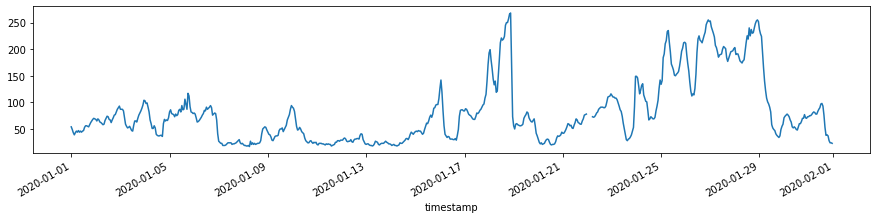

In [7]:
aqi_beijing['Beijing'].plot(figsize=(15,3))

In [8]:
beijing_0101 = df.loc[(df['date']==20200101)].loc[:,['date','hour','type','Beijing']].copy()
beijing_0101

,date,hour,type,Beijing
0,20200101,0,AQI,54.00
1,20200101,0,PM2.5,31.00
2,20200101,0,PM2.5_24h,20.00
3,20200101,0,PM10,57.00
4,20200101,0,PM10_24h,35.00
...,...,...,...,...
355,20200101,23,O3_24h,24.00
356,20200101,23,O3_8h,6.00
357,20200101,23,O3_8h_24h,19.00
358,20200101,23,CO,1.08


<AxesSubplot:xlabel='type'>

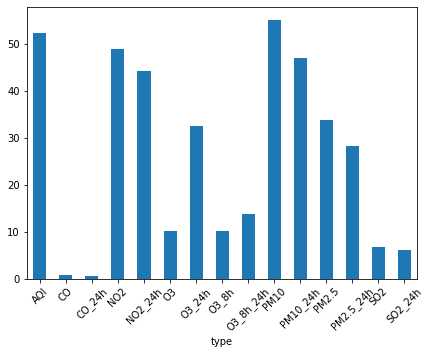

In [9]:
beijing_0101.groupby('type').agg('mean')['Beijing'].plot(kind='bar',rot=45,figsize=(7,5))

### A1
From the AQI time series chart, it can be seen that the air pollution in Beijing is more variable within January 2020, and the average air quality is worse in the second half of the month.  

Meanwhile, according to the histogram of the content of various pollutants, the main pollutants are NO2 and PM10

## Q2

In [10]:
ls_city = ['Beijing','Shanghai','Guangzhou','Shenzhen','Hangzhou','Xi\'an','Chengdu','Chongqing','Wuhan']

In [11]:
aqi_city = df.loc[(df['type']=='AQI')].loc[:,['date','hour']+ls_city].copy()
aqi_city.head()

,date,hour,Beijing,Shanghai,Guangzhou,Shenzhen,Hangzhou,Xi'an,Chengdu,Chongqing,Wuhan
0,20200101,0,54.0,20.0,54.0,67.0,59.0,96.0,149.0,98.0,69.0
15,20200101,1,49.0,21.0,54.0,66.0,61.0,101.0,146.0,97.0,66.0
30,20200101,2,43.0,23.0,54.0,68.0,62.0,102.0,144.0,103.0,64.0
45,20200101,3,39.0,23.0,54.0,67.0,61.0,108.0,151.0,107.0,67.0
60,20200101,4,43.0,21.0,56.0,64.0,60.0,108.0,141.0,105.0,67.0


In [12]:
aqi_daymax = pd.pivot_table(aqi_city, values=ls_city, index=['date'],aggfunc=np.max)
aqi_daymax

,Beijing,Chengdu,Chongqing,Guangzhou,Hangzhou,Shanghai,Shenzhen,Wuhan,Xi'an
date,,,,,,,,,
20200101,70.0,151.0,107.0,69.0,78.0,35.0,72.0,92.0,138.0
20200102,93.0,140.0,115.0,70.0,101.0,66.0,70.0,124.0,173.0
20200103,104.0,128.0,123.0,91.0,101.0,87.0,72.0,136.0,254.0
20200104,103.0,135.0,142.0,122.0,69.0,119.0,84.0,161.0,329.0
20200105,117.0,155.0,96.0,97.0,75.0,107.0,61.0,113.0,329.0
20200106,94.0,140.0,99.0,72.0,88.0,51.0,48.0,62.0,167.0
20200107,30.0,88.0,64.0,82.0,95.0,139.0,57.0,49.0,143.0
20200108,54.0,129.0,67.0,81.0,81.0,73.0,60.0,64.0,220.0
20200109,94.0,130.0,49.0,75.0,82.0,61.0,58.0,43.0,255.0


In [13]:
ls_stat = []
for city, i in aqi_daymax.iteritems():
    ls_stat.append([city,aqi_daymax[city][aqi_daymax[city].map(lambda x:int(x))>100].count(),aqi_daymax[city][aqi_daymax[city].map(lambda x:int(x))<=50].count()])
    #print(city+':',aqi_daymax[city][aqi_daymax[city].map(lambda x:int(x))>100].count())
airquality_daycount = pd.DataFrame(ls_stat,columns=['City','pollution days', 'fine days'],dtype=float)
airquality_daycount.set_index('City',inplace=True)
airquality_daycount

/var/folders/bs/kxxnj3bn72xbkc2mpwqvkt080000gn/T/ipykernel_39796/1648628418.py:5: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  airquality_daycount = pd.DataFrame(ls_stat,columns=['City','pollution days', 'fine days'],dtype=float)


,pollution days,fine days
City,,
Beijing,15.0,6.0
Chengdu,18.0,0.0
Chongqing,5.0,2.0
Guangzhou,1.0,8.0
Hangzhou,11.0,5.0
Shanghai,17.0,4.0
Shenzhen,0.0,8.0
Wuhan,17.0,3.0
Xi'an,29.0,0.0


<AxesSubplot:xlabel='City'>

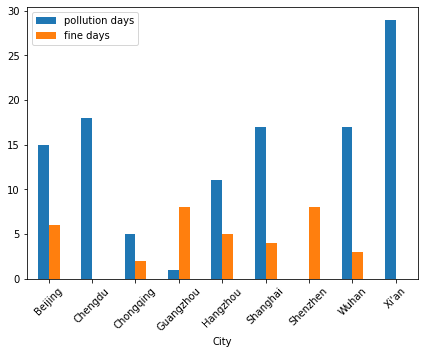

In [14]:
airquality_daycount.plot(kind="bar",rot=45,figsize=(7,5))

### A2
The number of days with excellent air quality (AQI less than 50) and poor air quality (AQI greater than 100) in January for each major city was counted by analyzing a pivot table of raw data.   

The statistical results show that Xi'an has the highest number of days with poor air quality and 0 days with good air quality, which is the worst among all cities; Guangzhou and Sehnzhen has the most fine days and the least polluted days .